<h1 align="center">Tackling Imbalanced Dataset using Resampling Techniques</h1>

<h2 align="center"> About the project </h2>

<p align = "justify">
In this project I've used a number of combinantions of different resampling techniques with various predictive classifiers to see which combination is working best in detecting whether a transaction is a valid transaction or a fraud. As mentioned above, the features are scaled and the names of the features are hidden due to privacy reasons.

</p>

---


<h2 align='center'> About the Dataset </h2>

<p align = "justify">
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset contains transactions that occurred in two days, where we have 492 fraud transactions out of 284,807 total transactions. The dataset is highly imbalanced, the positive class (frauds) accounts for 0.172% of all transactions.
</p>

<p align = "justify">
The dataset contains only numerical input variable columns which are the result of a PCA transformation done on the original dataset. Due to confidentiality issues, Original features were not provided. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of a fraud tansaction and 0 otherwise. 
</p>

---


 <h2 align = "center" >Outline</h2>
<p>
<h3>I. Exploratory Data Analysis</h3>
<ol type = None>
<li>a) Analysis of the data</li>
<li>b) Barplot</li>
<li>c) Distplot</li>
</ol>

<h3>II. Data Preprocessing</h3>
<ol type = None>
<li>a) Scaling using Robust Scaler</li>
<li>b) Splitting the Data into test and train sets<li>
</ol>
<h3>III. Resampling and Classification</h3>
<ol type = None>
<li>a) Resampling
    <ol type = None>
      <li>1) SMOTE (Synthetic Minority Oversampling Technique)
      <li>2) Random Over Sampling
      <li>3) Random Under Sampling
      <li>4) NearMiss
    </ol>
<li>b) Classification
    <ol type = None>
      <li>1) Logistic Regression
      <li>2) K-Nearst Neighbors
      <li>3) Decision Tree
      <li>4) Random Forest
    </ol>
</ol>

<h3>IV. Result</h3>
<ol type = None>
<li>a) Evaluation Metrics
<li>b) Confusion
</ol>

</p>


In [26]:
# Importing Libraries

# Basic Libraries.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import time
import warnings

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other important libraries
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit

# Resampling libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler 

# Evaluation Metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict


warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
#Setting up kaggle and importing dataset using api from kaggle.json
from google.colab import files
files.upload()
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
'chmod 600 /root/.kaggle/kaggle.json'
!kaggle datasets download -d mlg-ulb/creditcardfraud
!ls
!unzip creditcardfraud.zip
!ls

Saving kaggle.json to kaggle.json
 74% 49.0M/66.0M [00:00<00:00, 180MB/s]
100% 66.0M/66.0M [00:00<00:00, 161MB/s]
creditcardfraud.zip  kaggle.json  sample_data
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          
creditcard.csv	creditcardfraud.zip  kaggle.json  sample_data


<h2 align = "center"> Exploratory Data Analysis </h2>

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
print(df.isnull().sum().max())
print(df.shape)

0
(284807, 31)


In [6]:
# Checking the percentage of fraud and non-fraud transactions
fraud = df[df.Class==1]
non_fraud = df[df.Class==0]

# Fraction of fraud transactions
frac_of_fraud = len(fraud)/len(df)

# Fraction of non-fraud transactions
frac_of_non_fraud = len(non_fraud)/len(df)

print('Percentage of Frauds: {}%' .format(round(frac_of_fraud*100, 2)))
print('Percentage of Non-Frauds: {}%' .format(round(frac_of_non_fraud*100, 2)))

Percentage of Frauds: 0.17%
Percentage of Non-Frauds: 99.83%


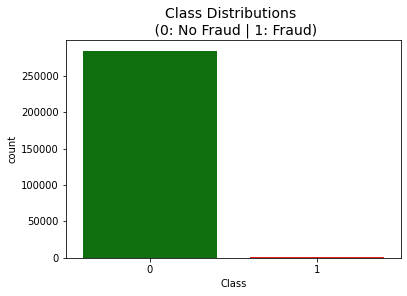

In [7]:
# Graphical Representation of fraud and non fraud transactions in the dataset
colors = ['green','red']
sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud | 1: Fraud)', 
          fontsize=14);

In [8]:
# From the above graph it is clear that the dataset is highly imbalanced.
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

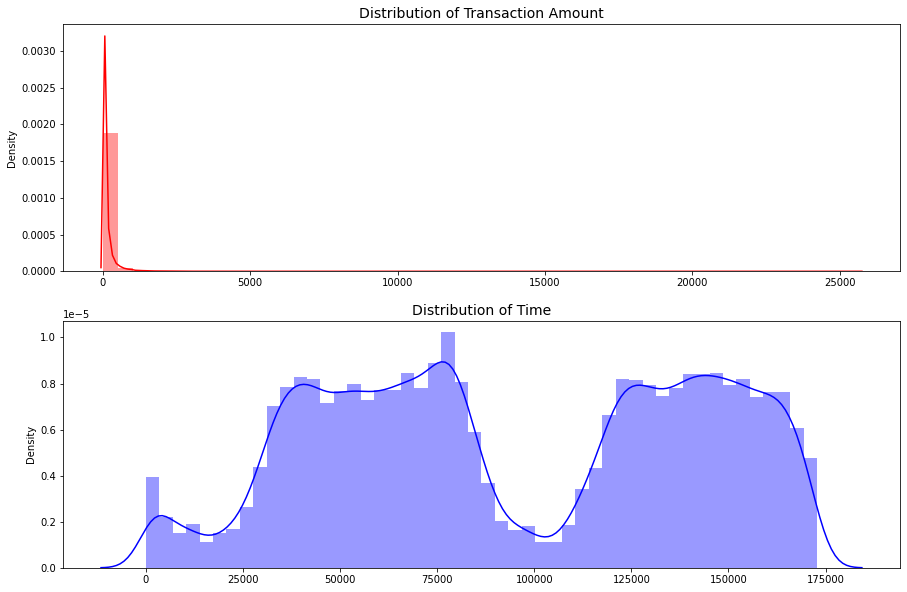

In [9]:
# This function is for checking the distribution of the non-transformed values which are 'Aomunt' and 'Time'.
def distplot(df):
  fig, ax = plt.subplots(nrows = 2, 
                         ncols = 1, 
                         figsize = (15,10))

  amnt = df['Amount'].to_numpy()
  tm = df['Time'].to_numpy()

  sns.distplot(amnt, color = 'r',
                ax = ax[0])
  ax[0].set_title('Distribution of Transaction Amount', 
                  fontsize=14);

  sns.distplot(tm, color = 'b',
              ax = ax[1]);
  ax[1].set_title('Distribution of Time', 
                fontsize=14)

distplot(df)

In [10]:
corr_matrix = df.corr()
corr_matrix['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

<h2 align = "center"> Data Preprocessing </h2>

In [11]:
# This function uses Robust Scaler for scaling since it is less prone to outliers.
def robustscaler(df):
  rob_scalar = RobustScaler()

  df['scaled_Time'] = rob_scalar.fit_transform(df['Time'].values.reshape(-1,1))
  df['scaled_Amount'] = rob_scalar.fit_transform(df['Amount'].values.reshape(-1,1))

  # Repositioning 'Time' and 'Amount' in the dataset
  df.drop(['Time','Amount'], 
          axis=1, 
          inplace=True)

  scaled_amount = df['scaled_Amount']
  scaled_time = df['scaled_Time']

  df.drop(['scaled_Amount', 'scaled_Time'], 
          axis=1, 
          inplace=True)
  
  df.insert(0, 'Amount', scaled_amount)
  df.insert(1, 'Time', scaled_time)

  return(df)

df = robustscaler(df)
df.head()

,Amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


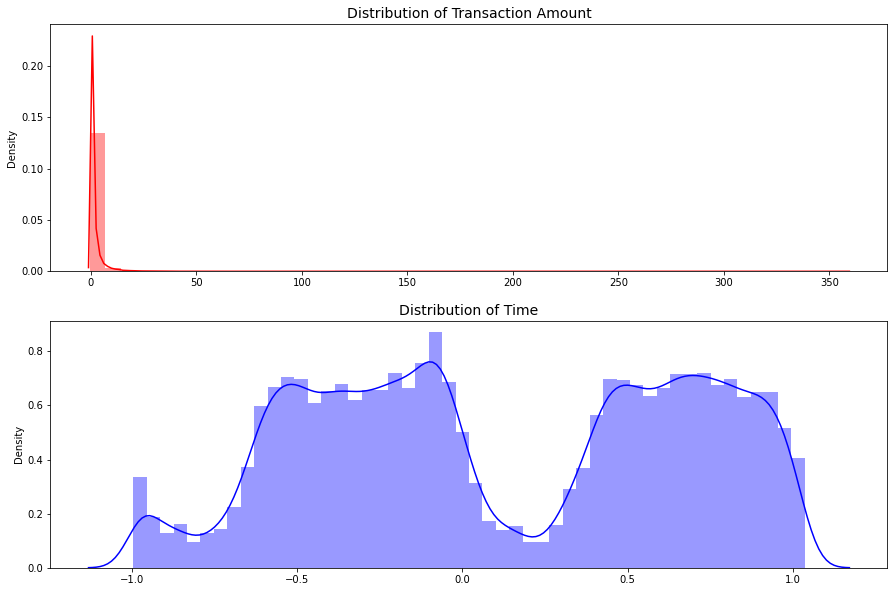

In [12]:
#Replotting the distplot to see the difference in distribution after robust scaling.  
distplot(df)

<h2 align = "center"> Resampling and Classification </h2>

In [13]:
# Creating a dictionary of classifiers and resampling methods.

# Classifiers
classf = {'LogisticRegression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'DecisionTree': DecisionTreeClassifier(),
          'RandomForest': RandomForestClassifier()}

# Resampling method (or strategy)
strat = {'Random Over Sampling': RandomOverSampler(sampling_strategy='minority'),
          'SMOTE': SMOTE(sampling_strategy='minority'),
          'Random Under Sampling': RandomUnderSampler(sampling_strategy='not minority'),
          'NearMiss': NearMiss(sampling_strategy='not minority')}

In [14]:
# Function for splitting the dataset
def split(df):
  X = df.drop('Class', axis = 1)
  y = df['Class']

  X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      test_size=0.25, 
                                                      random_state=1)

  return(X_train.to_numpy(),
  X_test.to_numpy(),
  y_train.to_numpy(),
  y_test.to_numpy())

X_train, X_test, y_train, y_test = split(df)

In [15]:
# Function for resampling the data, training the classifiers and predicting. Returns a dictionay of
# of combiantion of all the classifiers with all the training techniques.
def resample_train_predict(X_train, y_train, 
          X_test, y_test, 
          classf, strat):

  Res_dataframes = {}

  # Without resampling
  data = {'Metric':['Precision', 'Recall', 'F1', 'AUC/ROC']}

  # Training clasifiers and predicting
  for name, classifier in classf.items():
    clf = classifier.fit(X_train, y_train)
    pred = clf.predict(X_test)
    data[name] = [round(precision_score(y_test, pred), 2), 
                round(recall_score(y_test, pred), 2), 
                round(f1_score(y_test, pred), 2), 
                round(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]), 2)]

  res = pd.DataFrame(data)
  print('No Resampling:')
  print(res, '\n')

  Res_dataframes['No Resampling'] = res

  # Resampling and predicting.
  for key, method in strat.items():
    
    # Resampling
    temp_X_train, temp_y_train = method.fit_resample(X_train, y_train)
  
    data = {'Metric':['Precision', 'Recall', 'F1', 'AUC/ROC']}

    # Training classifiers on resampled data and predicting.
    for name, classsifier in classf.items():
      clf = classifier.fit(temp_X_train, temp_y_train)
      pred = clf.predict(X_test)
      data[name] = [round(precision_score(y_test, pred), 2), 
                round(recall_score(y_test, pred), 2), 
                round(f1_score(y_test, pred), 2), 
                round(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]), 2)]
  
    result = pd.DataFrame(data)
    Res_dataframes[key] = result
    print(key)
    print(result, '\n')
    data.clear()
    result = result.iloc[0:0]

  return(Res_dataframes)

Res_dataframes = resample_train_predict(X_train, y_train,
                                        X_test, y_test,
                                        classf, strat)

No Resampling:
      Metric  LogisticRegression   KNN  DecisionTree  RandomForest
0  Precision                0.83  0.92          0.72          0.93
1     Recall                0.58  0.71          0.73          0.75
2         F1                0.68  0.80          0.72          0.83
3    AUC/ROC                0.97  0.90          0.86          0.93 

Random Over Sampling
      Metric  LogisticRegression   KNN  DecisionTree  RandomForest
0  Precision                0.92  0.93          0.93          0.92
1     Recall                0.77  0.77          0.77          0.77
2         F1                0.84  0.85          0.84          0.84
3    AUC/ROC                0.93  0.93          0.93          0.94 

SMOTE
      Metric  LogisticRegression   KNN  DecisionTree  RandomForest
0  Precision                0.89  0.89          0.87          0.89
1     Recall                0.79  0.79          0.78          0.79
2         F1                0.84  0.84          0.82          0.84
3    AUC/ROC    

<h2 align = "center"> Result </h2>

In [16]:
#Function to print the result of the resampling techniques.
def resdisplay(result): # Takes a dictionary of dataframes as input
  for key, data in result.items():
    print('Resampling: ', key, '\n', data, '\n')

resdisplay(Res_dataframes)

Resampling:  No Resampling 
       Metric  LogisticRegression   KNN  DecisionTree  RandomForest
0  Precision                0.83  0.92          0.72          0.93
1     Recall                0.58  0.71          0.73          0.75
2         F1                0.68  0.80          0.72          0.83
3    AUC/ROC                0.97  0.90          0.86          0.93 

Resampling:  Random Over Sampling 
       Metric  LogisticRegression   KNN  DecisionTree  RandomForest
0  Precision                0.92  0.93          0.93          0.92
1     Recall                0.77  0.77          0.77          0.77
2         F1                0.84  0.85          0.84          0.84
3    AUC/ROC                0.93  0.93          0.93          0.94 

Resampling:  SMOTE 
       Metric  LogisticRegression   KNN  DecisionTree  RandomForest
0  Precision                0.89  0.89          0.87          0.89
1     Recall                0.79  0.79          0.78          0.79
2         F1                0.84  0.84 

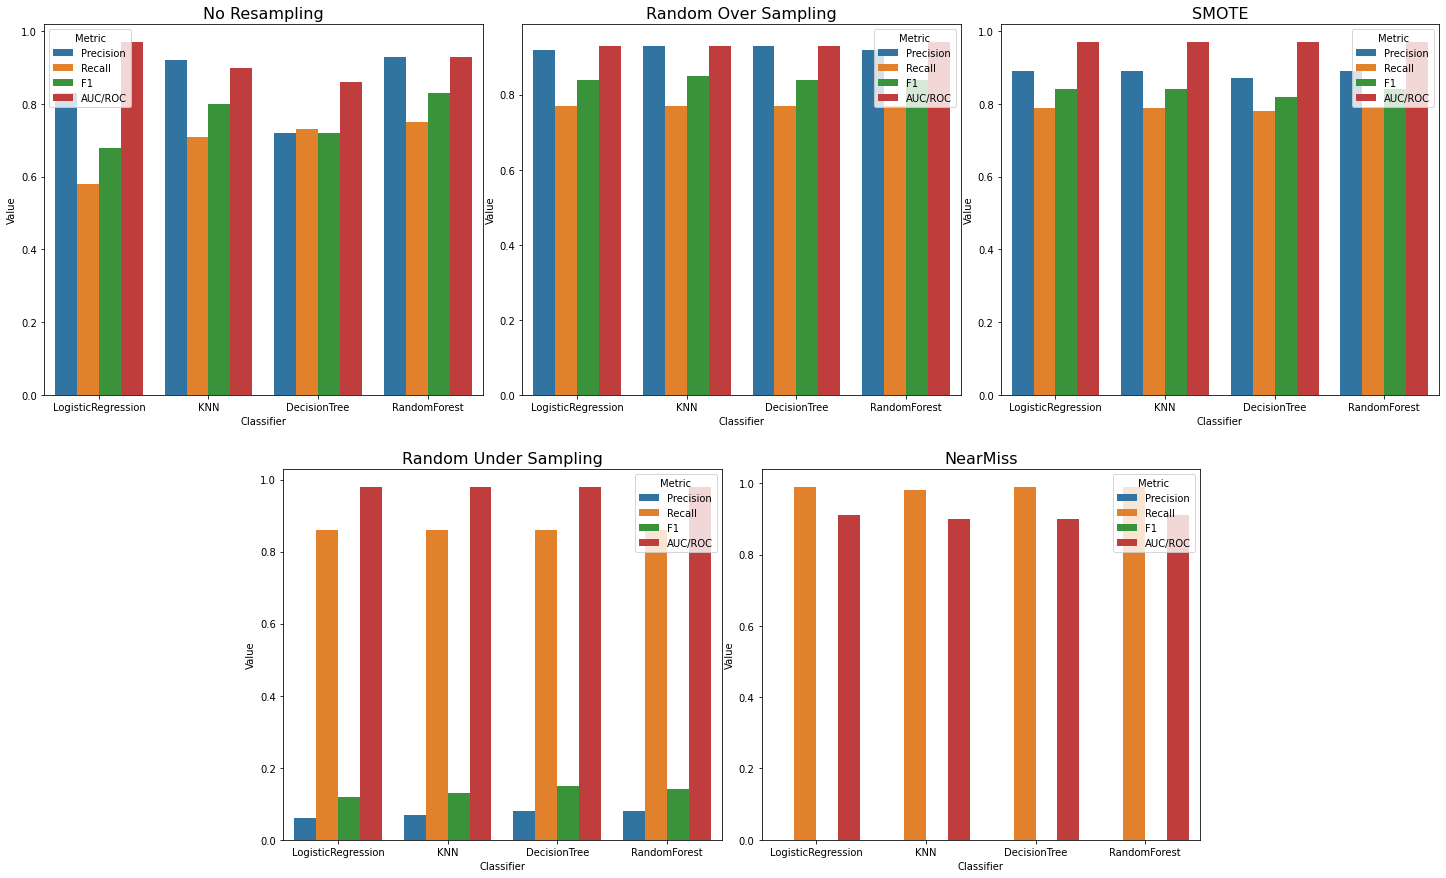

In [25]:
# Function to bar plot the resultant dataframes.
def barplotres(Res_dataframe):
  #Storing result of the resampled and non-resampled dataframe for plotting.
  bardata = Res_dataframe

  resample = [] # Store the name of the resampling technique
  data = [] # Store the dataframe associated with the resampling technique
  k=0 # Variable to traverse the above lists.

  # Reshaping the dataframes for plotting
  for key, dataframe in bardata.items():
    dataframe = dataframe.melt(id_vars='Metric').rename(columns=str.title)
    dataframe.rename({'Variable':'Classifier'}, 
                     axis=1, 
                     inplace=True)
    resample.insert(k, key)
    data.insert(k, dataframe)
    k=k+1
  
  fig = plt.subplots(figsize=(25,15))

  #Axes
  ax1 = plt.subplot2grid(shape=(2,6),  
                         loc=(0,0), 
                         colspan=2)
  ax2 = plt.subplot2grid(shape=(2,6), 
                         loc=(0,2), 
                         colspan=2)
  ax3 = plt.subplot2grid(shape=(2,6), 
                         loc=(0,4), 
                         colspan=2)
  ax4 = plt.subplot2grid(shape=(2,6), 
                         loc=(1,1), 
                         colspan=2)
  ax5 = plt.subplot2grid(shape=(2,6), 
                         loc=(1,3), 
                         colspan=2)
  
  axes = [ax1, ax2, ax3, ax4, ax5]

  # Plotting the graphs and setting titles on axes
  k=0
  for d in data:
    axes[k].set_title(resample[k],
                      fontsize=16)
    sns.barplot(x='Classifier',
                y='Value',
                hue='Metric',
                data=d,
                ax=axes[k])
    k=k+1

barplotres(Res_dataframes)

<p align = "justify"> From the graph it is clear that over sampling techniques, i.e., Random Over Sampling and SMOTE, are working best for this dataset. While under sampling techniques are not working here. Among the Classifiers Random Forest is working best for the dataset. It has good Recall and Precision, decent ROC/AUC score when compared to other classifiers. Logistic Regression is the worst working classifier. </p>

---

<p align = "justify"> Further I'll compare the confusion matrix of Random Forest with the resampled data from Random Over Sampling and SMOTE to see which technique produces lesser number of false positive. As false positive can flag a valid tansaction as fraud which can be very troublesome for the customer.</p>

In [28]:
best_method = {'SMOTE': SMOTE(sampling_strategy='minority'),
               'Random Over Sampling': RandomOverSampler(sampling_strategy='minority')}


In [30]:
def confusionmatrix(X_train, y_train,
                    X_test, y_test,
                    resample):
  conf_mat = {}
  rf = RandomForestClassifier()

  # Resample, train the model and calculate confusion matrix.
  for key, res in resample.items():
    temp_X_train, temp_y_train = res.fit_resample(X_train, y_train)
    clf = rf.fit(temp_X_train, temp_y_train)
    pred = clf.predict(X_test)
    conf_mat[key] = confusion_matrix(y_test, pred)
  
  return(conf_mat)

confmat = confusionmatrix(X_train, y_train,
                          X_test, y_test,
                          best_method)

In [34]:
for key, val in confmat.items():
  print(key)
  print(val)

SMOTE
[[71080    11]
 [   24    87]]
Random Over Sampling
[[71084     7]
 [   26    85]]


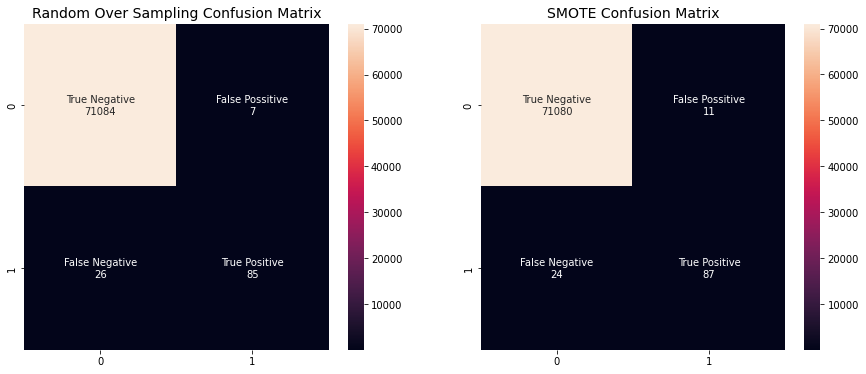

In [70]:
def confmatplot(confmat):
  fig, ax = plt.subplots(nrows=1,
                         ncols=2,
                         figsize=(15,6))
  smconf = confmat['SMOTE']
  rosconf = confmat['Random Over Sampling']

  rosflt = rosconf.flatten()
  smflt = smconf.flatten()

  labels = ["True Negative","False Possitive","False Negative","True Positive"]
  rlabels = ["","","",""]
  smlabels = ["","","",""]
  # For Random Over Sampling
  for i in range(4):
    rlabels[i] = labels[i] + '\n' + str(rosflt[i])

  rlabels = np.asarray(rlabels).reshape(2,2)
  sns.heatmap(rosconf,
              fmt='',
              annot=rlabels,
              ax=ax[0]);
  ax[0].set_title("Random Over Sampling Confusion Matrix",
                  fontsize=14)
  # For SMOTE
  for i in range(4):
    smlabels[i] = labels[i] + '\n' + str(smflt[i])

  smlabels = np.asarray(smlabels).reshape(2,2)
  sns.heatmap(smconf,
              fmt='',
              annot=smlabels,
              ax=ax[1]);
  ax[1].set_title("SMOTE Confusion Matrix",
                  fontsize=14)

confmatplot(confmat)

<h2 align="center"> Conclusion </h2>

<p align = "Justify"> From the above confusion matrix visualization it can be observed that the Random Over sampling technique is working slightly better than the SMOTE technique due to the lower number false positives. Overall from this project it can be concluded that the for the famous credicard.csv dataset Random Over Sampling with Random Forest works best when it comes to classification. </p>